#자연어 데이터 처리

## 데이터 준비 및 환경 준비

mecab활용을 위한 설치 코드

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-07-18 16:24:20--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-07-18 16:24:21--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb0e7fb84bdc0d46a6c5191bdf4.dl.dropboxusercontent.com/cd/0/get/BpV6q0OqdgV9rfOlu_pfKynBJ3u7a2hAFArotsmM79ui8U5yr6aAmhlUBhT6g25PP9AjpS_YC2pxWt8kaajiz9XiR4DQbS6mGMVuovPwtarDsTyS7YxTYkp_-k6vtHNoA05mZvj2DnQCumbH-2cAgH--mvKG-I3KICtxIqEafjylW-HPUp7mcT7NglRxB1SQ8EI/file?dl=1# [following]
--2022-07-18 16:24:21--  https://ucb0e7fb84bdc0d46a6c5191bdf4.dl.dropboxusercontent.com/cd/0/get/

In [ ]:
import os
import sys
from konlpy.tag import Okt, Mecab
import pandas as pd
import numpy as np
import re
import copy
import pickle

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 불러오기

In [ ]:
okt = Okt()
mecab = Mecab() # mecab이 토큰화에서 성능이 제일 좋다고 한다.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/KRX금융빅데이터/데이터/텍스트데이터/tokens_eventRet.csv')

In [ ]:
data = data.drop(labels='Unnamed: 0', axis=1)

## 텍스트 데이터 전처리

일자 별 뉴스 제목을 토큰화 한 후에 

위 data를 만들기 위해 거쳐왔던 코드들 필요한가?

In [ ]:
txt = pd.read_csv('/content/drive/MyDrive/KRX금융빅데이터/데이터/텍스트데이터/txt_all.csv') # 거래일 없는 행 삭제한 데이터

In [ ]:
txt_data = pd.DataFrane

In [ ]:
list(set(txt['일자'].tolist()))

## 이벤트 수익률 기반 감성사전 생성

In [ ]:
vo_cnt = {}
vocab = {}
cnt = 0

for i in data['tokens']:
  i = i.split(' ')
  for j in range(len(i)):
      if i[j] in vocab or len(i[j])<=1:
          cnt += 1
          pass
      else:
          vocab[i[j]] = 0
          vo_cnt[i[j]] = 0
print('빈 사전을 만들었어요')
print(len(vocab), vocab) # 확인
print(len(vo_cnt), vo_cnt)

import collections

for i,w in enumerate(data['tokens']):
    w = w.split(' ')
    for j in range(len(w)):
      noun = w[j]
      if len(noun)<=1:
        continue
      vocab[noun] = vocab[noun] + data['eventRet'][i]
      vo_cnt[noun] += 1

for key in list(vocab.keys()):
  vocab[key] = vocab[key] / vo_cnt[key]

print('사전이 채워졌어요')
print(len(vocab), vocab) # 확인
print(len(vo_cnt), vo_cnt)

vocab_sort = sorted(vocab.items(), key=lambda x: x[1], reverse=True)
print('감성점수 상위 30')
print(vocab_sort[:30]) # 


num_list = []
for key, value in vo_cnt.items():
  num_list.append(value)

print('현재 사전의 길이는', len(vocab), '인데 좀 많습니다. 사전에 있는 단어 빈도 평균 이하는 제거하겠습니다.')

under_th = []

for key, value in vo_cnt.items():
  if vo_cnt[key] <= 113:
    under_th.append(key)

for w in under_th:
  del vocab[w]

print('사전의 길이:', len(vocab))
print('변화한 사전의 감성점수 상위 30 단어')
vocab_sort = sorted(vocab.items(), key=lambda x: x[1], reverse=True)
vocab_sort[:30]

## 일별 그래프(워드 클라우드, 빈도 그래프) 함수

In [ ]:
from wordcloud import WordCloud

# 워드 클라우드 생성
def make_wordcloud(text):
    word_max = 100
    wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color='white',
                    max_words=word_max, max_font_size=200, height=700, width=900).generate(text)
    plt.figure(figsize = (20, 10))
    plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거

In [ ]:
import nltk

# make noun frequency graph per religion
def make_top_word_graph(result, top):
  use_tokens = []
  tokens = mecab.morphs(result) # 문자열을 공백 기준으로 구분
  for token in tokens:
    if len(token) > 1:
      use_tokens.append(token)
  text = nltk.Text(use_tokens) # nltk 
  topWord = text.vocab().most_common(top) # top n word
  count = 30 # top word on graph
  xlist = [a[0] for a in topWord[:count ]]
  ylist = [a[1] for a in topWord[:count ]]

  plt.figure(figsize = (15, 10))
  plt.xticks(rotation=70) # x축 라벨 회전
  plt.title('keyword' +' TOP '+str(count)+' WORD')
  plt.xticks(fontsize=20)
  plt.plot(xlist,ylist)

  ret = []

  for i in xlist:
    ret.append(vocab[i])

  plt.figure(figsize = (15, 10))

  plt.xticks(rotation=70) # x축 라벨 회전
  plt.title('words Sent')
  plt.xticks(fontsize=20)
  plt.plot(xlist,ret)

## 그래프 그리는 함수 실행시키는 함수(입력시 '2000-00-00' 형식으로 입력)

In [ ]:
def top_word_graph():
  day = input()
  make_top_word_graph(data['tokens'][data[data['date'] == day].index[0]], 30)
  print('이벤트 수익률', data['eventRet'][data[data['date'] == day].index[0]])

In [ ]:
def wc_grapth():
  day = input()
  make_wordcloud(data['tokens'][data[data['date'] == day].index[0]])
  print('이벤트 수익률', data['eventRet'][data[data['date'] == day].index[0]])

한글 패치

In [ ]:
# colab에서 사용시 이 코드 실핼 후에 런타임 다시 시작하고  아래 코드 실행

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

## 일별 단어 빈도수 그래프와 단어의 감성점수


In [ ]:
top_word_graph() # 실행시키고 2022-06-30 형식으로 입력하면 그래프 출력

## 일별 워드 클라우드

2022-06-30
이벤트 수익률 0.0


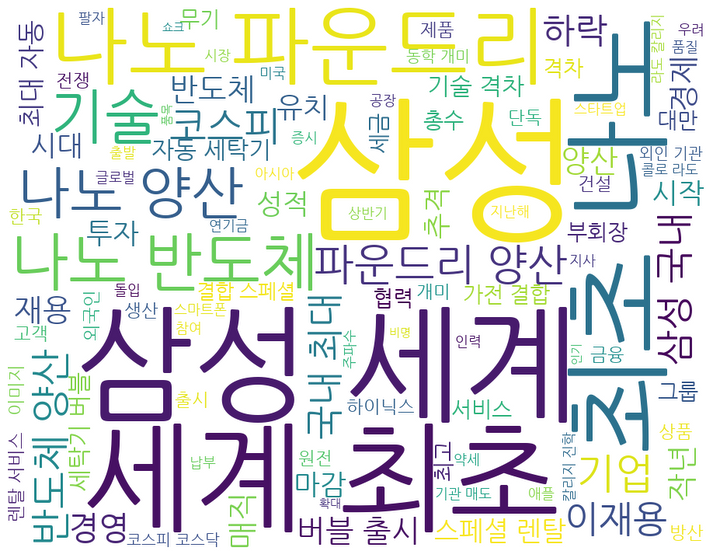

In [ ]:
wc_grapth()

## 1년 수익률(이벤트)과 감성점수 그래프 (상관관계는 명확하지 않다)

In [ ]:
def year_grapg(year):  
  intersection = list(set(list(data[data['date'] >= (str(year) + '-01-01')].index)) & set(list(data[data['date'] <= (str(year) + '-12-31')].index)))

  date_list = []
  sent_list = []
  ret_list = []

  for i in intersection:
    date_list.append(data['date'][i])
    sent_list.append(data['sent_event'][i])

  for i in intersection:
    ret_list.append(data['eventRet'][i])

  year_sent = pd.DataFrame(data = list(zip(date_list, sent_list)), columns=['date', 'sent_event'])
  year_ret = pd.DataFrame(data = list(zip(date_list, ret_list)), columns=['date', 'eventRet'])

  plt.figure(figsize = (10, 7))
  plt.plot(year_sent['date'], year_sent['sent_event'], color='r')
  plt.xticks([range(0, 2, 2)], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
  plt.title('year_sent_score')

  plt.figure(figsize = (10, 7))
  plt.plot(year_ret['date'], year_ret['eventRet'], color='b')
  plt.xticks([range(0, 2, 2)], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
  plt.title('year_ret')

  plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


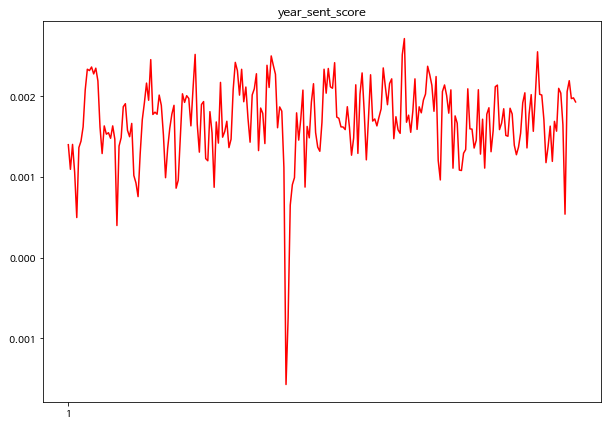

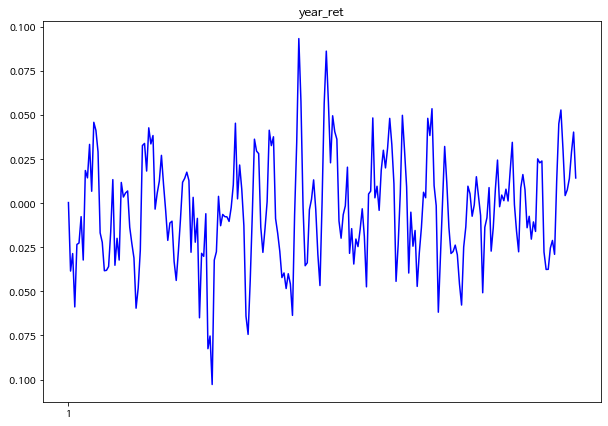

In [ ]:
year_grapg(2018)

## 사전 데이터 프레임화

In [ ]:
vocab_df = pd.DataFrame({'word' : list(vocab.keys()), 'num' : list(vocab.values())})

vocab_df = vocab_df.sort_values(by='num')
vocab_df = vocab_df.reset_index(drop=True)

vocab_df['num1000'] = vocab_df['num'] * 1000 # 워드 클라우드에 사용하려면 int이어야 한다. 점수가 0.00대이니 1000을 곱해준다

# 감성점수 평균으로 라벨링하는 코드
# sent_tf = []
# for i in range(len(vocab_df['num'])):
#   if vocab_df['num'][i] > vocab_df['num'].mean():
#     sent_tf.append(1)
#   else:
#     sent_tf.append(0)
# vocab_df['sent_label'] = sent_tf
# vocab_df

vocab_df

,word,num,num1000
0,투매,-0.029438,-29.437665
1,폭락,-0.029181,-29.181210
2,석방,-0.028969,-28.968754
3,중지,-0.028301,-28.300644
4,단종,-0.026940,-26.939855
...,...,...,...
4987,야후,0.020840,20.839863
4988,외환은행,0.020990,20.989747
4989,빅딜,0.022586,22.586253
4990,국조,0.027517,27.517484


## 감성점수 긍정, 부정의 상위, 하위 20개 그래프

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


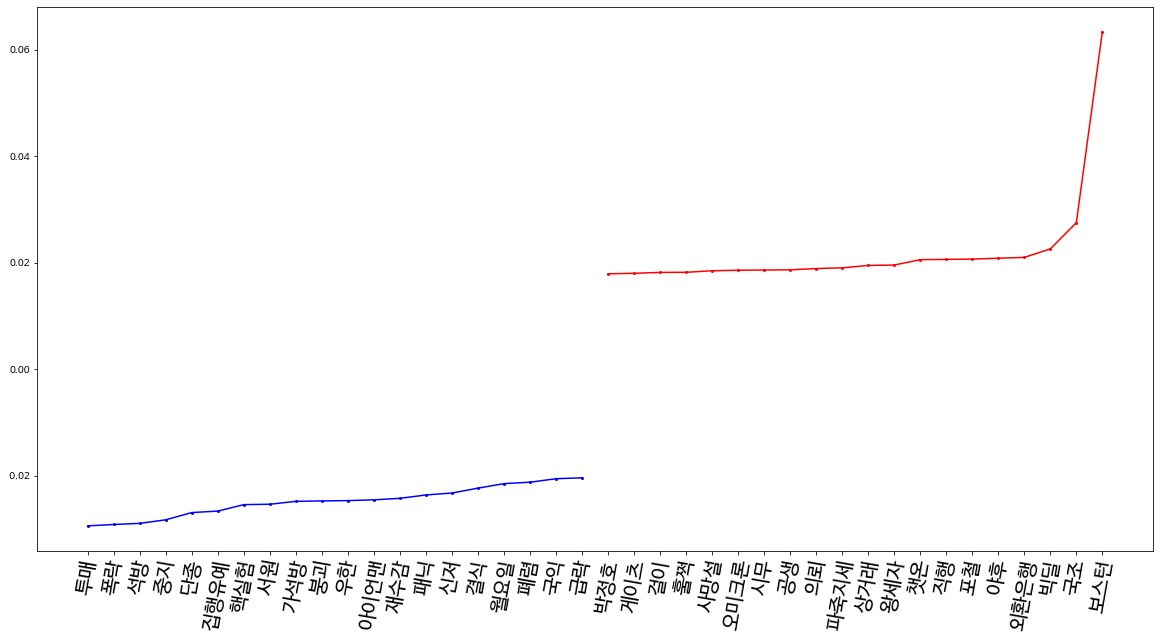

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(vocab_df['word'].head(20), vocab_df['num'].head(20), 'b', marker='o', markersize=2)
plt.xticks(rotation=80)
plt.grid()

# fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(vocab_df['word'].tail(20), vocab_df['num'].tail(20), 'r', marker='o', markersize=2)
plt.xticks(rotation=80)
plt.xticks(fontsize=20)
plt.grid()

## 감성 점수 큰 순으로 워드클라우드로 생성(일별X 전체O)

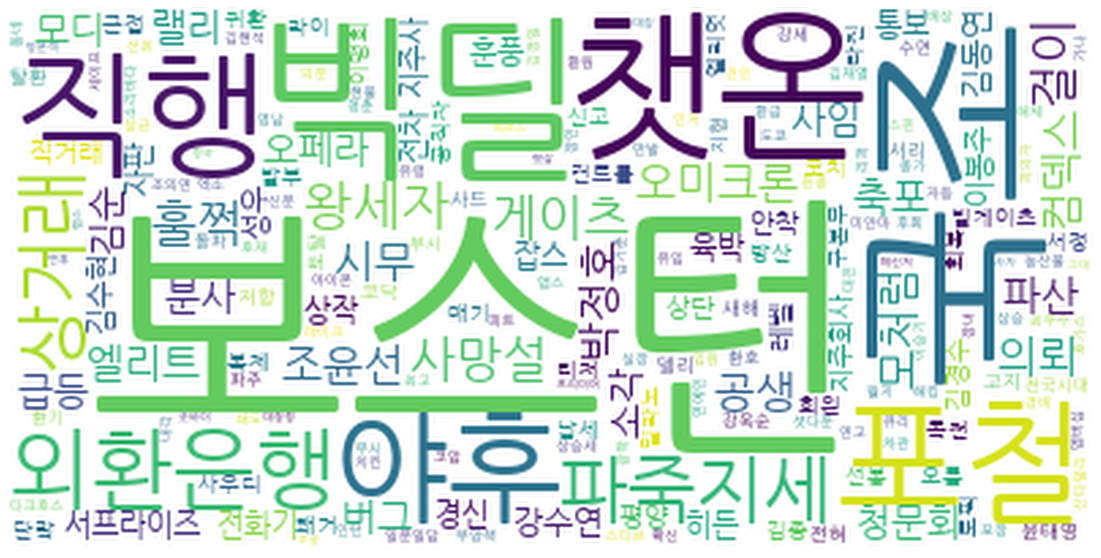

In [ ]:
wc_df = vocab_df[['word', 'num1000']]
wc_df = wc_df.set_index('word')
wc_df['num1000'] = wc_df['num1000'].astype(int)

wc_num = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', background_color='white').generate_from_frequencies(wc_df['num1000'])
plt.figure(figsize = (20, 10))
plt.imshow(wc_num, interpolation='lanczos')
plt.axis('off')
plt.show()

In [ ]:
vocab['코로나']

-0.0018531469024522752

In [ ]:
data['tokens'][0].split(' ')

## 모델에 적용할 sent_score 생성

In [ ]:
sent_event = []
for i in range(len(data)):
  a = 0
  for word in data['tokens'][i].split(' '):
    if word == '':
      continue
    try: 
      a += vocab[word]
    except:
      pass
  sent_event.append(a/(len(data['tokens'][i].split(' ')) -1))
  print(len(sent_event), sent_event)

In [ ]:
data['sent_event'] = sent_event

In [ ]:
data.to_csv('sent_score_remove.csv')

In [ ]:
data # 빈도수 낮은 단어 삭제 안한 것

,date,tokens,eventRet,sent_event
0,2000-01-04,올해 상위 주요 그룹 일제 시무 새해 출발 짐표 올해 경상 이익 상위 사표 인터넷 ...,0.000000,0.002186
1,2000-01-05,주가 급등 장외 종목 관심 폭발 새천년 증시 출발 세계 최고 새천년 증시 출발 오늘...,0.000000,0.002209
2,2000-01-06,분기 조정 국면 회복 가주 군단 이모저모 디지털 장선 가전 경쟁 가열 새해 게임 제...,-0.093809,0.000558
3,2000-01-07,주가 이틀 폭락 안팎 쌍방울 야구단 인수 리노 공업 채윤 사장 샐러리맨 엑소더스 스...,0.034450,0.001240
4,2000-01-10,표준 협회 밀레니엄 프론티어 대상 제품 선정 국내 연구 개발 투자 기업 삼성 샐러리...,0.027281,0.002271
...,...,...,...,...
5545,2022-06-24,반도체 격차 인텔 세계 삼성 돌격 종목 매수 관망 바닥 고심 개미 레이더 정부 경제...,0.020799,0.001799
5546,2022-06-27,정의선 장녀 결혼식 재계 총수 출동 삼성 스마트 시티 비대 봉사 활동 통해 상당 물...,0.034475,0.002064
5547,2022-06-28,눈물 개미 중간 배당 막차 타자 배당 수익 수도 이재용 베르사체 원피스 가격 코스피...,-0.006516,0.001585
5548,2022-06-29,임금 인상 자제 물가 상승 노동자 책임 반발 추경호 발언 상무 한미 경제 협력 삼성...,-0.030606,0.001086


In [ ]:
no_remove = pd.read_csv('/content/drive/MyDrive/KRX금융빅데이터/데이터/텍스트데이터/sent_score.csv')
no_remove # 빈도수 낮은 단어 삭제 한 것

,Unnamed: 0,date,tokens,eventRet,sent_event
0,0,2000-01-04,올해 상위 주요 그룹 일제 시무 새해 출발 짐표 올해 경상 이익 상위 사표 인터넷 ...,0.000000,0.002268
1,1,2000-01-05,주가 급등 장외 종목 관심 폭발 새천년 증시 출발 세계 최고 새천년 증시 출발 오늘...,0.000000,0.001925
2,2,2000-01-06,분기 조정 국면 회복 가주 군단 이모저모 디지털 장선 가전 경쟁 가열 새해 게임 제...,-0.093809,-0.000272
3,3,2000-01-07,주가 이틀 폭락 안팎 쌍방울 야구단 인수 리노 공업 채윤 사장 샐러리맨 엑소더스 스...,0.034450,0.001517
4,4,2000-01-10,표준 협회 밀레니엄 프론티어 대상 제품 선정 국내 연구 개발 투자 기업 삼성 샐러리...,0.027281,0.002349
...,...,...,...,...,...
5545,5545,2022-06-24,반도체 격차 인텔 세계 삼성 돌격 종목 매수 관망 바닥 고심 개미 레이더 정부 경제...,0.020799,0.001963
5546,5546,2022-06-27,정의선 장녀 결혼식 재계 총수 출동 삼성 스마트 시티 비대 봉사 활동 통해 상당 물...,0.034475,0.002563
5547,5547,2022-06-28,눈물 개미 중간 배당 막차 타자 배당 수익 수도 이재용 베르사체 원피스 가격 코스피...,-0.006516,0.001349
5548,5548,2022-06-29,임금 인상 자제 물가 상승 노동자 책임 반발 추경호 발언 상무 한미 경제 협력 삼성...,-0.030606,0.000681


#머신러닝 (ExtraTreeClassifier)

##EtraTreeClassifier

In [11]:
#필요모델 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from lightgbm import LGBMClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 데이터취합(보조지표)3.csv to 데이터취합(보조지표)3.csv


In [42]:
data1 = pd.read_csv('데이터취합(보조지표)3.csv',encoding='cp949')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving sent_score.csv to sent_score.csv


In [41]:
data99 = pd.read_csv('sent_score.csv')

In [43]:
abcd = data99['sent_event']
abcd2 = list(abcd)
data1['sent_event'] = abcd2

In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5550 non-null   object 
 1   Amount         5550 non-null   float64
 2   Marcap         5550 non-null   float64
 3   Stocks         5550 non-null   int64  
 4   Adj Close      5550 non-null   float64
 5   Return         5549 non-null   float64
 6   pred           5545 non-null   float64
 7   pred2          5545 non-null   float64
 8   number         5550 non-null   int64  
 9   sox            5550 non-null   float64
 10  RSI            5536 non-null   float64
 11  RSI_diff       5535 non-null   float64
 12  appended_RSI   5550 non-null   int64  
 13  MACD           5550 non-null   float64
 14  Signal_Line    5550 non-null   float64
 15  MACD_signal    5550 non-null   int64  
 16  OBV            5550 non-null   int64  
 17  OBV_EMA        5550 non-null   float64
 18  OBV_sign

In [ ]:
del data1['cli']

In [10]:
data1.to_excel('취합데이터4.xlsx')

In [47]:
data1 = data1.dropna()

In [48]:
# 입력변수 X, 출력변수 y 할당
X =pd.DataFrame(data1[data1.columns.difference(['Date','pred','pred2'])])
y = data1['pred2']
print(y.head())
print('X.shape:', X.shape, 'y.shape:', y.shape)

1413    2.0
1414    0.0
1415    0.0
1416    0.0
1417    0.0
Name: pred2, dtype: float64
X.shape: (4132, 55) y.shape: (4132,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import seaborn as sns

In [50]:
#extratree
et = ExtraTreesClassifier(n_estimators = 100,random_state=42)
et.fit(X_train, y_train)
scores = cross_validate(et, X_train, y_train, return_train_score=True, n_jobs=-1)
#단어사전 반영 결과 평균훈련점수
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.6747352496217853


In [51]:
#분류모델 정확도 출력
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print('정확도:\n', accuracy)
w_preds = et.predict(X_test)
get_clf_eval(y_test, w_preds)

정확도:
 0.7037484885126964


In [52]:
#분류모델 오차행렬 출력
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    print('오차행렬:\n', confusion)
get_clf_eval(y_test, w_preds)

오차행렬:
 [[108   2  96]
 [  2 114  71]
 [ 34  40 360]]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_

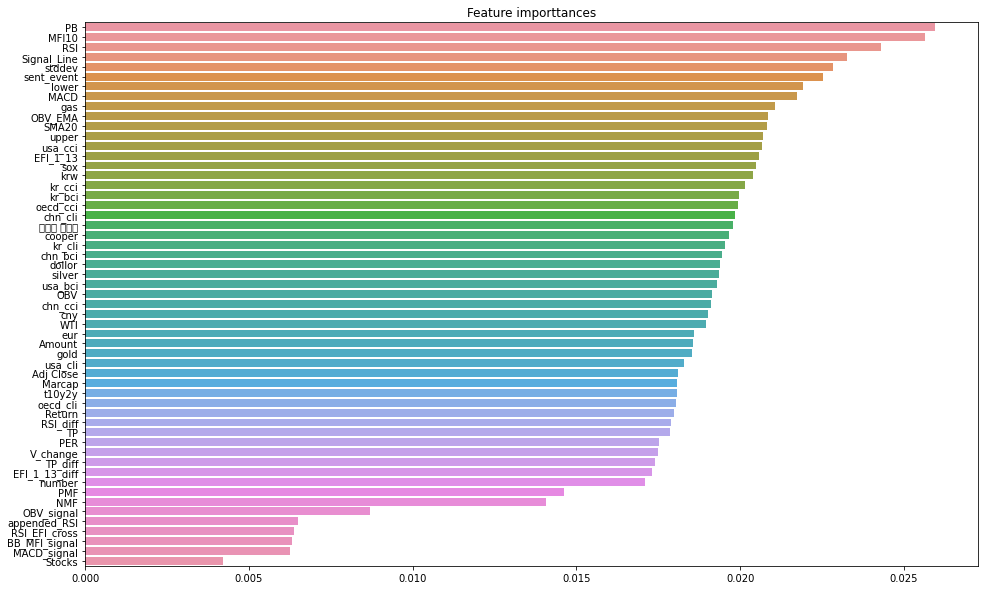

In [57]:
ttr_importances_values= et.feature_importances_
feature_importances = pd.Series(ttr_importances_values, index= X.columns)
tfr_top20=feature_importances.sort_values(ascending=False)[:60]

plt.figure(figsize=(16,10))
plt.title('Feature importtances')
sns.barplot(x=tfr_top20, y=tfr_top20.index)
plt.show()

##하위 5개항목 제거후 머신러닝 학습

In [58]:
del data1['Stocks']
del data1['BB_MFI_signal']
del data1['RSI_EFI_cross']
del data1['MACD_signal']
del data1['OBV_signal']

In [59]:
# 입력변수 X, 출력변수 y 할당
X =pd.DataFrame(data1[data1.columns.difference(['Date','pred','pred2'])])
y = data1['pred2']
print(y.head())
print('X.shape:', X.shape, 'y.shape:', y.shape)

1413    2.0
1414    0.0
1415    0.0
1416    0.0
1417    0.0
Name: pred2, dtype: float64
X.shape: (4132, 50) y.shape: (4132,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
#extratree
et2 = ExtraTreesClassifier(n_estimators = 100,random_state=42)
et2.fit(X_train, y_train)
scores2 = cross_validate(et, X_train, y_train, return_train_score=True, n_jobs=-1)
#단어사전 반영 결과 평균 훈련점수
print(np.mean(scores2['train_score']), np.mean(scores2['test_score']))

1.0 0.6659606656580938


In [62]:
#분류모델 정확도 출력   --> 정확도 소폭 상승
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print('정확도:\n', accuracy)
w_preds = et2.predict(X_test)
get_clf_eval(y_test, w_preds)

정확도:
 0.7122128174123338


In [63]:
#분류모델 오차행렬 출력
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    print('오차행렬:\n', confusion)
get_clf_eval(y_test, w_preds)

오차행렬:
 [[108   2  67]
 [  3 117  75]
 [ 38  53 364]]


##LGBM

In [64]:
lgbm = LGBMClassifier(n_estimators=5000)
lgbm.fit(X_train, y_train, early_stopping_rounds=500, eval_metric='multiclass', eval_set=[(X_test,y_test)], verbose = True)

[1]	valid_0's multi_logloss: 0.98264
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's multi_logloss: 0.968719
[3]	valid_0's multi_logloss: 0.955547
[4]	valid_0's multi_logloss: 0.945214
[5]	valid_0's multi_logloss: 0.934764
[6]	valid_0's multi_logloss: 0.923824
[7]	valid_0's multi_logloss: 0.914144
[8]	valid_0's multi_logloss: 0.90317
[9]	valid_0's multi_logloss: 0.895221
[10]	valid_0's multi_logloss: 0.886959
[11]	valid_0's multi_logloss: 0.880006
[12]	valid_0's multi_logloss: 0.873358
[13]	valid_0's multi_logloss: 0.867198
[14]	valid_0's multi_logloss: 0.861337
[15]	valid_0's multi_logloss: 0.854857
[16]	valid_0's multi_logloss: 0.849925
[17]	valid_0's multi_logloss: 0.845698
[18]	valid_0's multi_logloss: 0.842005
[19]	valid_0's multi_logloss: 0.838731
[20]	valid_0's multi_logloss: 0.834812
[21]	valid_0's multi_logloss: 0.830381
[22]	valid_0's multi_logloss: 0.826238
[23]	valid_0's multi_logloss: 0.822786
[24]	valid_0's multi_logloss: 0.819484
[25]	valid_

LGBMClassifier(n_estimators=5000)

In [65]:
#분류모델 정확도 출력
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print('정확도:\n', accuracy)
w_preds2 = lgbm.predict(X_test)
get_clf_eval(y_test, w_preds2)

정확도:
 0.6904474002418379


In [66]:
#분류모델 오차행렬 출력
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    print('오차행렬:\n', confusion)
get_clf_eval(y_test, w_preds2)

오차행렬:
 [[ 97   3  77]
 [  7 107  81]
 [ 36  52 367]]


##코로나 발생 전 10년 데이터 활용 학습 (2010년 1월 4일~2020년 1월 6일)

In [67]:
data1

,Date,Amount,Marcap,Adj Close,Return,pred,pred2,number,sox,RSI,...,kr_cli,chn_cli,usa_cli,oecd_cli,oecd_cci,kr_cci,chn_cci,usa_cci,WTI,sent_event
1413,2005-10-04,3.270000e+11,8.870000e+13,14853.84101,0.023810,0.002212,2.0,1413,472.920013,55.752212,...,101.06650,100.350100,100.727300,100.578400,100.096400,100.210000,99.515150,99.061660,63.90,0.002543
1414,2005-10-05,2.700000e+11,8.850000e+13,14829.16686,-0.001661,-0.004000,0.0,1414,466.420013,47.422680,...,101.07115,100.349425,100.734161,100.585375,100.105043,100.215607,99.514769,99.076419,62.79,0.002235
1415,2005-10-06,2.490000e+11,8.630000e+13,14459.05454,-0.024958,-0.007947,0.0,1415,458.350006,37.142857,...,101.07580,100.348750,100.741021,100.592350,100.113686,100.221214,99.514389,99.091178,61.36,0.001465
1416,2005-10-07,2.990000e+11,8.560000e+13,14335.68377,-0.008532,-0.006622,0.0,1416,461.109985,37.500000,...,101.08045,100.348075,100.747882,100.599325,100.122329,100.226821,99.514008,99.105937,61.84,0.001463
1417,2005-10-10,1.790000e+11,8.730000e+13,14631.77362,0.020654,-0.005222,0.0,1417,446.149994,50.000000,...,101.09440,100.346050,100.768464,100.620250,100.148257,100.243643,99.512866,99.150214,61.80,0.002574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,2022-06-17,1.730000e+12,3.570000e+14,59800.00000,-0.018062,-0.005074,0.0,5540,2578.540039,20.388350,...,98.86522,98.250150,99.363800,99.505810,96.479190,99.528470,90.547910,95.633100,109.56,-0.000276
5541,2022-06-20,2.000000e+12,3.500000e+14,58700.00000,-0.018395,-0.003087,0.0,5541,2631.662598,13.888889,...,98.86522,98.250150,99.363800,99.505810,96.479190,99.528470,90.547910,95.633100,108.84,0.000226
5542,2022-06-21,1.480000e+12,3.490000e+14,58500.00000,-0.003407,-0.000872,2.0,5542,2649.370117,3.061224,...,98.86522,98.250150,99.363800,99.505810,96.479190,99.528470,90.547910,95.633100,110.65,0.000950
5543,2022-06-22,1.360000e+12,3.440000e+14,57600.00000,-0.015385,-0.004655,0.0,5543,2619.709961,2.884615,...,98.86522,98.250150,99.363800,99.505810,96.479190,99.528470,90.547910,95.633100,106.19,0.000873


In [95]:
data2 = data1[1057:3523]

In [96]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 2470 to 4935
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2466 non-null   object 
 1   Amount         2466 non-null   float64
 2   Marcap         2466 non-null   float64
 3   Adj Close      2466 non-null   float64
 4   Return         2466 non-null   float64
 5   pred           2466 non-null   float64
 6   pred2          2466 non-null   float64
 7   number         2466 non-null   int64  
 8   sox            2466 non-null   float64
 9   RSI            2466 non-null   float64
 10  RSI_diff       2466 non-null   float64
 11  appended_RSI   2466 non-null   int64  
 12  MACD           2466 non-null   float64
 13  Signal_Line    2466 non-null   float64
 14  OBV            2466 non-null   int64  
 15  OBV_EMA        2466 non-null   float64
 16  SMA20          2466 non-null   float64
 17  stddev         2466 non-null   float64
 18  upper

In [97]:
# 입력변수 X, 출력변수 y 할당
X =pd.DataFrame(data1[data1.columns.difference(['Date','pred','pred2'])])
y = data1['pred2']
print(y.head())
print('X.shape:', X.shape, 'y.shape:', y.shape)

1413    2.0
1414    0.0
1415    0.0
1416    0.0
1417    0.0
Name: pred2, dtype: float64
X.shape: (4132, 50) y.shape: (4132,)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
#extratree(코로나 전 10년)
et3 = ExtraTreesClassifier(n_estimators = 100,random_state=42)
et3.fit(X_train, y_train)
scores3 = cross_validate(et3, X_train, y_train, return_train_score=True, n_jobs=-1)

In [100]:
#분류모델 정확도 출력  --> 정확도가 미세하게 올랐다
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print('정확도:\n', accuracy)
w_preds = et3.predict(X_test)
get_clf_eval(y_test, w_preds)

정확도:
 0.713422007255139


In [101]:
#분류모델 오차행렬 출력
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    print('오차행렬:\n', confusion)
get_clf_eval(y_test, w_preds)

오차행렬:
 [[108   1  78]
 [  2 119  71]
 [ 38  47 363]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[108   1  78]
 [  2 119  71]
 [ 38  47 363]]


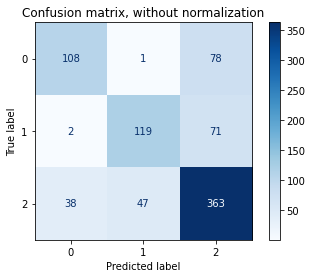

In [104]:
#오차행렬 시각화
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None)]


for title, normalize in titles_options:
    disp = plot_confusion_matrix(et3, X_test, y_test,
                                 display_labels=[0,1,2],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_

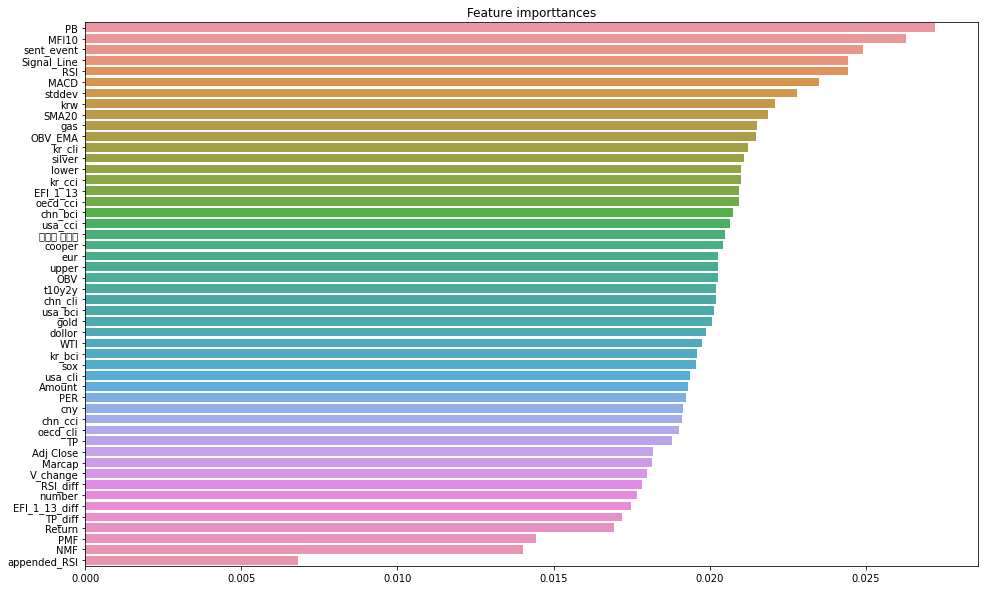

In [175]:
#특성 중요도 시각화
ttr_importances_values= et3.feature_importances_
feature_importances = pd.Series(ttr_importances_values, index= X.columns)
tfr_top20=feature_importances.sort_values(ascending=False)[:60]

plt.figure(figsize=(16,10))
plt.title('Feature importtances')
sns.barplot(x=tfr_top20, y=tfr_top20.index)
plt.show()

In [109]:
data3 = data1[-100:]

In [176]:
top50_f = []
for i in tfr_top20.index[0:60]:
  top50_f.append(str(i))
data5 = data3[top50_f]

In [195]:
#코로나 이후 100일간의 데이터를 통한 모델 정확도 확인
final_pred = et3.predict(data5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [196]:
print(f"최종 메타모델 정확도 : {accuracy_score(data3['pred2'], final_pred):.4f}")

최종 메타모델 정확도 : 0.6300


In [197]:
len(data3['pred2'])

100

In [139]:
#과적합 발생 (전부 2번 상황(보합세)으로 예측됨)
final_pred.mean()

2.0

##최종 모델 테스트(최근 300일 예측)

In [186]:
data6 = pd.DataFrame(data1[data1.columns.difference(['Date','pred','pred2'])])

In [187]:
data7 = data6[-300:]

In [189]:
final_pred2 = et2.predict(data7)

In [190]:
print(f"최종 메타모델 정확도 : {accuracy_score(data1['pred2'][-300:], final_pred2):.4f}")

최종 메타모델 정확도 : 0.9600


In [200]:
#사용된 데이터
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 5245 to 5544
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Adj Close      300 non-null    float64
 1   Amount         300 non-null    float64
 2   EFI_1_13       300 non-null    float64
 3   EFI_1_13_diff  300 non-null    float64
 4   MACD           300 non-null    float64
 5   MFI10          300 non-null    float64
 6   Marcap         300 non-null    float64
 7   NMF            300 non-null    float64
 8   OBV            300 non-null    int64  
 9   OBV_EMA        300 non-null    float64
 10  PB             300 non-null    float64
 11  PER            300 non-null    float64
 12  PMF            300 non-null    float64
 13  RSI            300 non-null    float64
 14  RSI_diff       300 non-null    float64
 15  Return         300 non-null    float64
 16  SMA20          300 non-null    float64
 17  Signal_Line    300 non-null    float64
 18  TP    